###**OBJECTIVE:**
- Design and develop a basic agentic AI System that can:
  - Perform Decision-making tasks based on input
  - Simulate autonomy by:
    - Taking actions according to predefined goals.
    - Responding to dnamic Environments(Changing Conditions)

###**PROBLEM STATEMENT:**
- Create a simple agentic AI that can learn from its environment and make decisions.
- The AI should be able to:
  - Receive input data (such as actions or conditions).
  - Learn from the inputs using basic reinforcement learning (RL) techniques.
  - Make decisions based on the learning to achieve defined goals.

###**IMPORTING LIBRRAIES**

In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

###**GENERATE ENVIRONMENT DATASET**

In [2]:
# Generate Grid Environment
grid_size = 5
env = np.zeros((grid_size, grid_size))

# Randomly place obstacles (-1), goal (10), rest are 0
np.random.seed(42)
env[random.randint(0, 4)][random.randint(0, 4)] = -1
env[random.randint(0, 4)][random.randint(0, 4)] = -1
goal_pos = (random.randint(0, 4), random.randint(0, 4))
env[goal_pos] = 10

df_env = pd.DataFrame(env)
df_env.columns = [f'Col_{i}' for i in range(grid_size)]
df_env.index = [f'Row_{i}' for i in range(grid_size)]
print("Grid World Environment:")
df_env

Grid World Environment:


,Col_0,Col_1,Col_2,Col_3,Col_4
Row_0,0.0,0.0,0.0,0.0,0.0
Row_1,0.0,0.0,0.0,0.0,0.0
Row_2,0.0,-1.0,0.0,0.0,0.0
Row_3,10.0,0.0,0.0,0.0,0.0
Row_4,0.0,-1.0,0.0,0.0,0.0


#Observation:
- grid_size = 5, Defines the environment as a 5x5 grid.
- env = np.zeros((grid_size, grid_size)).
- Initializes a 5x5 grid with all values set to 0
- Sets the random seed so results are reproducible, The same random values will be generated every time you run it.

#Final Observation:
- The goal is placed at Row 3, Column 0 (value = 10.0).
- There are two obstacles:
  - One at Row 2, Column 1
  - Another at Row 4, Column 1
- All other positions are safe empty spaces (0.0) that the agent can move through freely.
- The agent should avoid Column 1

###**EDA**

Environment Summary:
           Col_0     Col_1  Col_2  Col_3  Col_4
count   5.000000  5.000000    5.0    5.0    5.0
mean    2.000000 -0.400000    0.0    0.0    0.0
std     4.472136  0.547723    0.0    0.0    0.0
min     0.000000 -1.000000    0.0    0.0    0.0
25%     0.000000 -1.000000    0.0    0.0    0.0
50%     0.000000  0.000000    0.0    0.0    0.0
75%     0.000000  0.000000    0.0    0.0    0.0
max    10.000000  0.000000    0.0    0.0    0.0


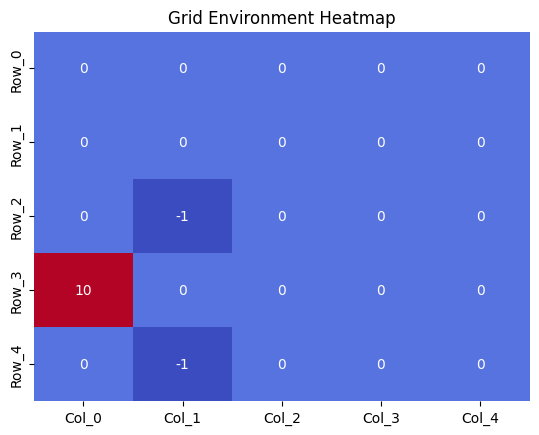

In [3]:
print("Environment Summary:")
print(df_env.describe())

sns.heatmap(df_env, annot=True, cmap="coolwarm", cbar=False)
plt.title("Grid Environment Heatmap")
plt.show()

#Observation:
- The goal is at Row 3, Column 0, this is where the agent gets the highest reward.
- There are two obstacles:
  - One at Row 2, Column 1
  - One at Row 4, Column 1
  - The agent should not step on these.
- All other places have 0, so they are safe to move.
- The agent should find a smart path to reach the goal while avoiding the obstacles.

###**DEFINE Q-LEARNING COMPONENTS**

In [4]:
# Define actions
actions = ['up', 'down', 'left', 'right']

# Initialize Q-Table
q_table = np.zeros((grid_size, grid_size, len(actions)))

alpha = 0.1
gamma = 0.9
epsilon = 0.8
episodes = 1000

###**Q-LEARNING ALGORITHM**

In [5]:
# Get reward from environment
def get_reward(pos):
    x, y = pos
    if x < 0 or x >= grid_size or y < 0 or y >= grid_size:
        return -5  # Penalty for hitting wall
    return env[x][y]

# Get next position based on action
def next_position(pos, action):
    x, y = pos
    if action == 'up':
        x -= 1
    elif action == 'down':
        x += 1
    elif action == 'left':
        y -= 1
    elif action == 'right':
        y += 1
    return max(0, min(x, grid_size - 1)), max(0, min(y, grid_size - 1))

# Training
for ep in range(episodes):
    pos = (random.randint(0, grid_size - 1), random.randint(0, grid_size - 1))
    while env[pos] != 10:
        if random.uniform(0, 1) < epsilon:
            action = random.choice(actions)
        else:
            action = actions[np.argmax(q_table[pos[0], pos[1]])]

        new_pos = next_position(pos, action)
        reward = get_reward(new_pos)
        old_q = q_table[pos[0], pos[1], actions.index(action)]
        next_max = np.max(q_table[new_pos[0], new_pos[1]])

        # Q-Learning update
        q_table[pos[0], pos[1], actions.index(action)] = old_q + alpha * (reward + gamma * next_max - old_q)

        pos = new_pos

###**DEMO : SIMULATE AGENT MOVEMENT**

In [6]:
def simulate_agent(start):
    pos = start
    path = [pos]
    for _ in range(20):
        action = actions[np.argmax(q_table[pos[0], pos[1]])]
        pos = next_position(pos, action)
        path.append(pos)
        if env[pos] == 10:
            break
    return path

start_point = (0, 0)
path_taken = simulate_agent(start_point)

print("Path taken by agent from", start_point, "to goal:", path_taken)

Path taken by agent from (0, 0) to goal: [(0, 0), (1, 0), (2, 0), (3, 0)]


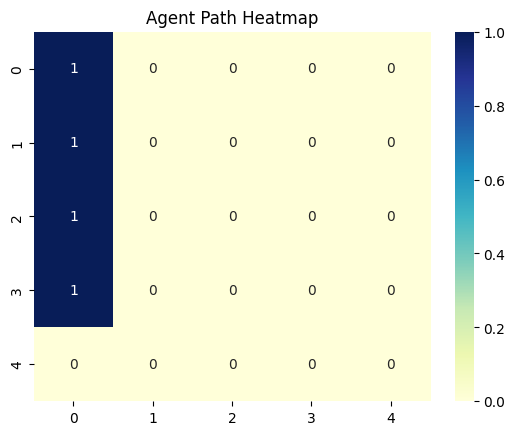

In [7]:
# Plotting agent path
path_map = np.zeros((grid_size, grid_size))
for step in path_taken:
    path_map[step] += 1

sns.heatmap(path_map, annot=True, cmap="YlGnBu")
plt.title("Agent Path Heatmap")
plt.show()

#Observation:
- he agent moved straight down from Row 0 to Row 3 in Column 0.
- The value 1 means the agent visited that cell.
- The agent reached the goal at Row 3, Column 0 — the goal cell.
- The agent did not visit any other columns, which means it learned a short and direct path.
- This path avoided all obstacles and reached the goal safely.

# Agentic AI: Q-Learning Based Grid World Navigator

## Problem Statement

Design and develop a simple **agentic AI system** that can **navigate a grid** to reach a goal while **learning from the environment**.  
The agent should make decisions based on rewards and penalties, simulating autonomy by learning from experience using **Reinforcement Learning** (Q-Learning).

---

##  Approach

1. **Environment Design**:
   - A custom **5x5 grid world** was created using NumPy and visualized with Seaborn.
   - The grid includes:
     - Empty spaces (`0`)  
     - Obstacles (`-1`)  
     - A goal (`10`)

2. **Learning Algorithm**:
   - Implemented **Q-Learning**, a model-free reinforcement learning algorithm.
   - The agent learns **action-value pairs** to decide the best path.

3. **Reward System**:
   - Goal: `+10`
   - Obstacle: `-1`
   - Out-of-bound or wall hit: `-5`
   - Empty cell: `0`

4. **Agent Behavior**:
   - The agent starts from a random position and uses exploration/exploitation to learn.
   - Over multiple episodes, it learns to find the **shortest and safest path** to the goal.

---

## Technology Stack

- **Language**: Python 3
- **Libraries**:  
  - `numpy`  
  - `pandas`  
  - `matplotlib`  
  - `seaborn`

- **Platform**: Google Colab (recommended for running)

---

## How to Run the Code

1. Open the notebook in Google Colab or Jupyter.
2. Run each cell step-by-step:
   - Environment Setup
   - Grid Visualization
   - Q-Learning Logic
   - Simulation of Agent Movement
3. Final heatmap will show the **agent’s path** to the goal.
4. Modify the grid or episodes to test different strategies.

---

## Demo Output

- **Grid Heatmap**: Shows where goal and obstacles are placed.
- **Agent Path Heatmap**: Shows how the trained agent navigates through the grid.

---

## Deliverables

- Clean, well-commented code
- Trained Q-learning model
- Heatmap-based visual demo
- This README file

---

## Learning Outcomes

- Learned how to build a **grid world simulation**.
- Understood and implemented **Q-learning**.
- Developed an **AI agent** capable of autonomous decision-making.